<a href="https://colab.research.google.com/github/SarahFeanor/Portfolio-DataScience/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<sub> 🔗[GitHub](https://github.com/SarahFeanor) | [LinkedIn](https://www.linkedin.com/in/sarahfrezende/) | [Portfólio](https://github.com/sarahfeanor/Portfolio-DataScience) | [Medium](https://medium.com/@sarahfrezende)  </sub>

📂 Projeto | Data Science | By Sarah Faria Rezende

---

# **Churn Prediction (Previsão de Rotatividade de Clientes)**

A **Churn Prediction**, também conhecida como previsão de rotatividade de clientes, é uma técnica que utiliza análise de dados para antecipar quais **clientes** têm **maior probabilidade** de **cancelar** um **serviço** ou **deixar de adquirir um produto**. Essa abordagem é extensamente empregada por empresas de diversos setores, como telecomunicações, varejo, serviços financeiros e tecnologia. Seu objetivo é evitar a perda de clientes, bem como aprimorar a satisfação e a fidelização dos mesmos.

A previsão de churn é de extrema importância, visto que a rotatividade de clientes pode acarretar diversos prejuízos para uma empresa. Esses impactos podem incluir diminuição das receitas, redução da parcela de mercado e aumento dos custos relacionados à aquisição de novos clientes. Adicionalmente, a perda de clientes pode servir como um indicativo de problemas nos processos de atendimento ao cliente ou nos produtos ofertados. Essas questões podem ser endereçadas e resolvidas para melhorar a qualidade global da empresa.

A aplicação da previsão de churn possibilita que as empresas identifiquem os clientes com maior probabilidade de deixar de fazer negócios com elas. Isso, por sua vez, permite a adoção de estratégias direcionadas para reter esses clientes, o que pode envolver a oferta de benefícios especiais, promoções ou melhorias nos produtos e serviços oferecidos. Dessa forma, a previsão de churn não somente contribui para a manutenção de receitas e a ampliação da base de clientes, mas também auxilia na construção de um relacionamento mais duradouro e satisfatório com os consumidores.

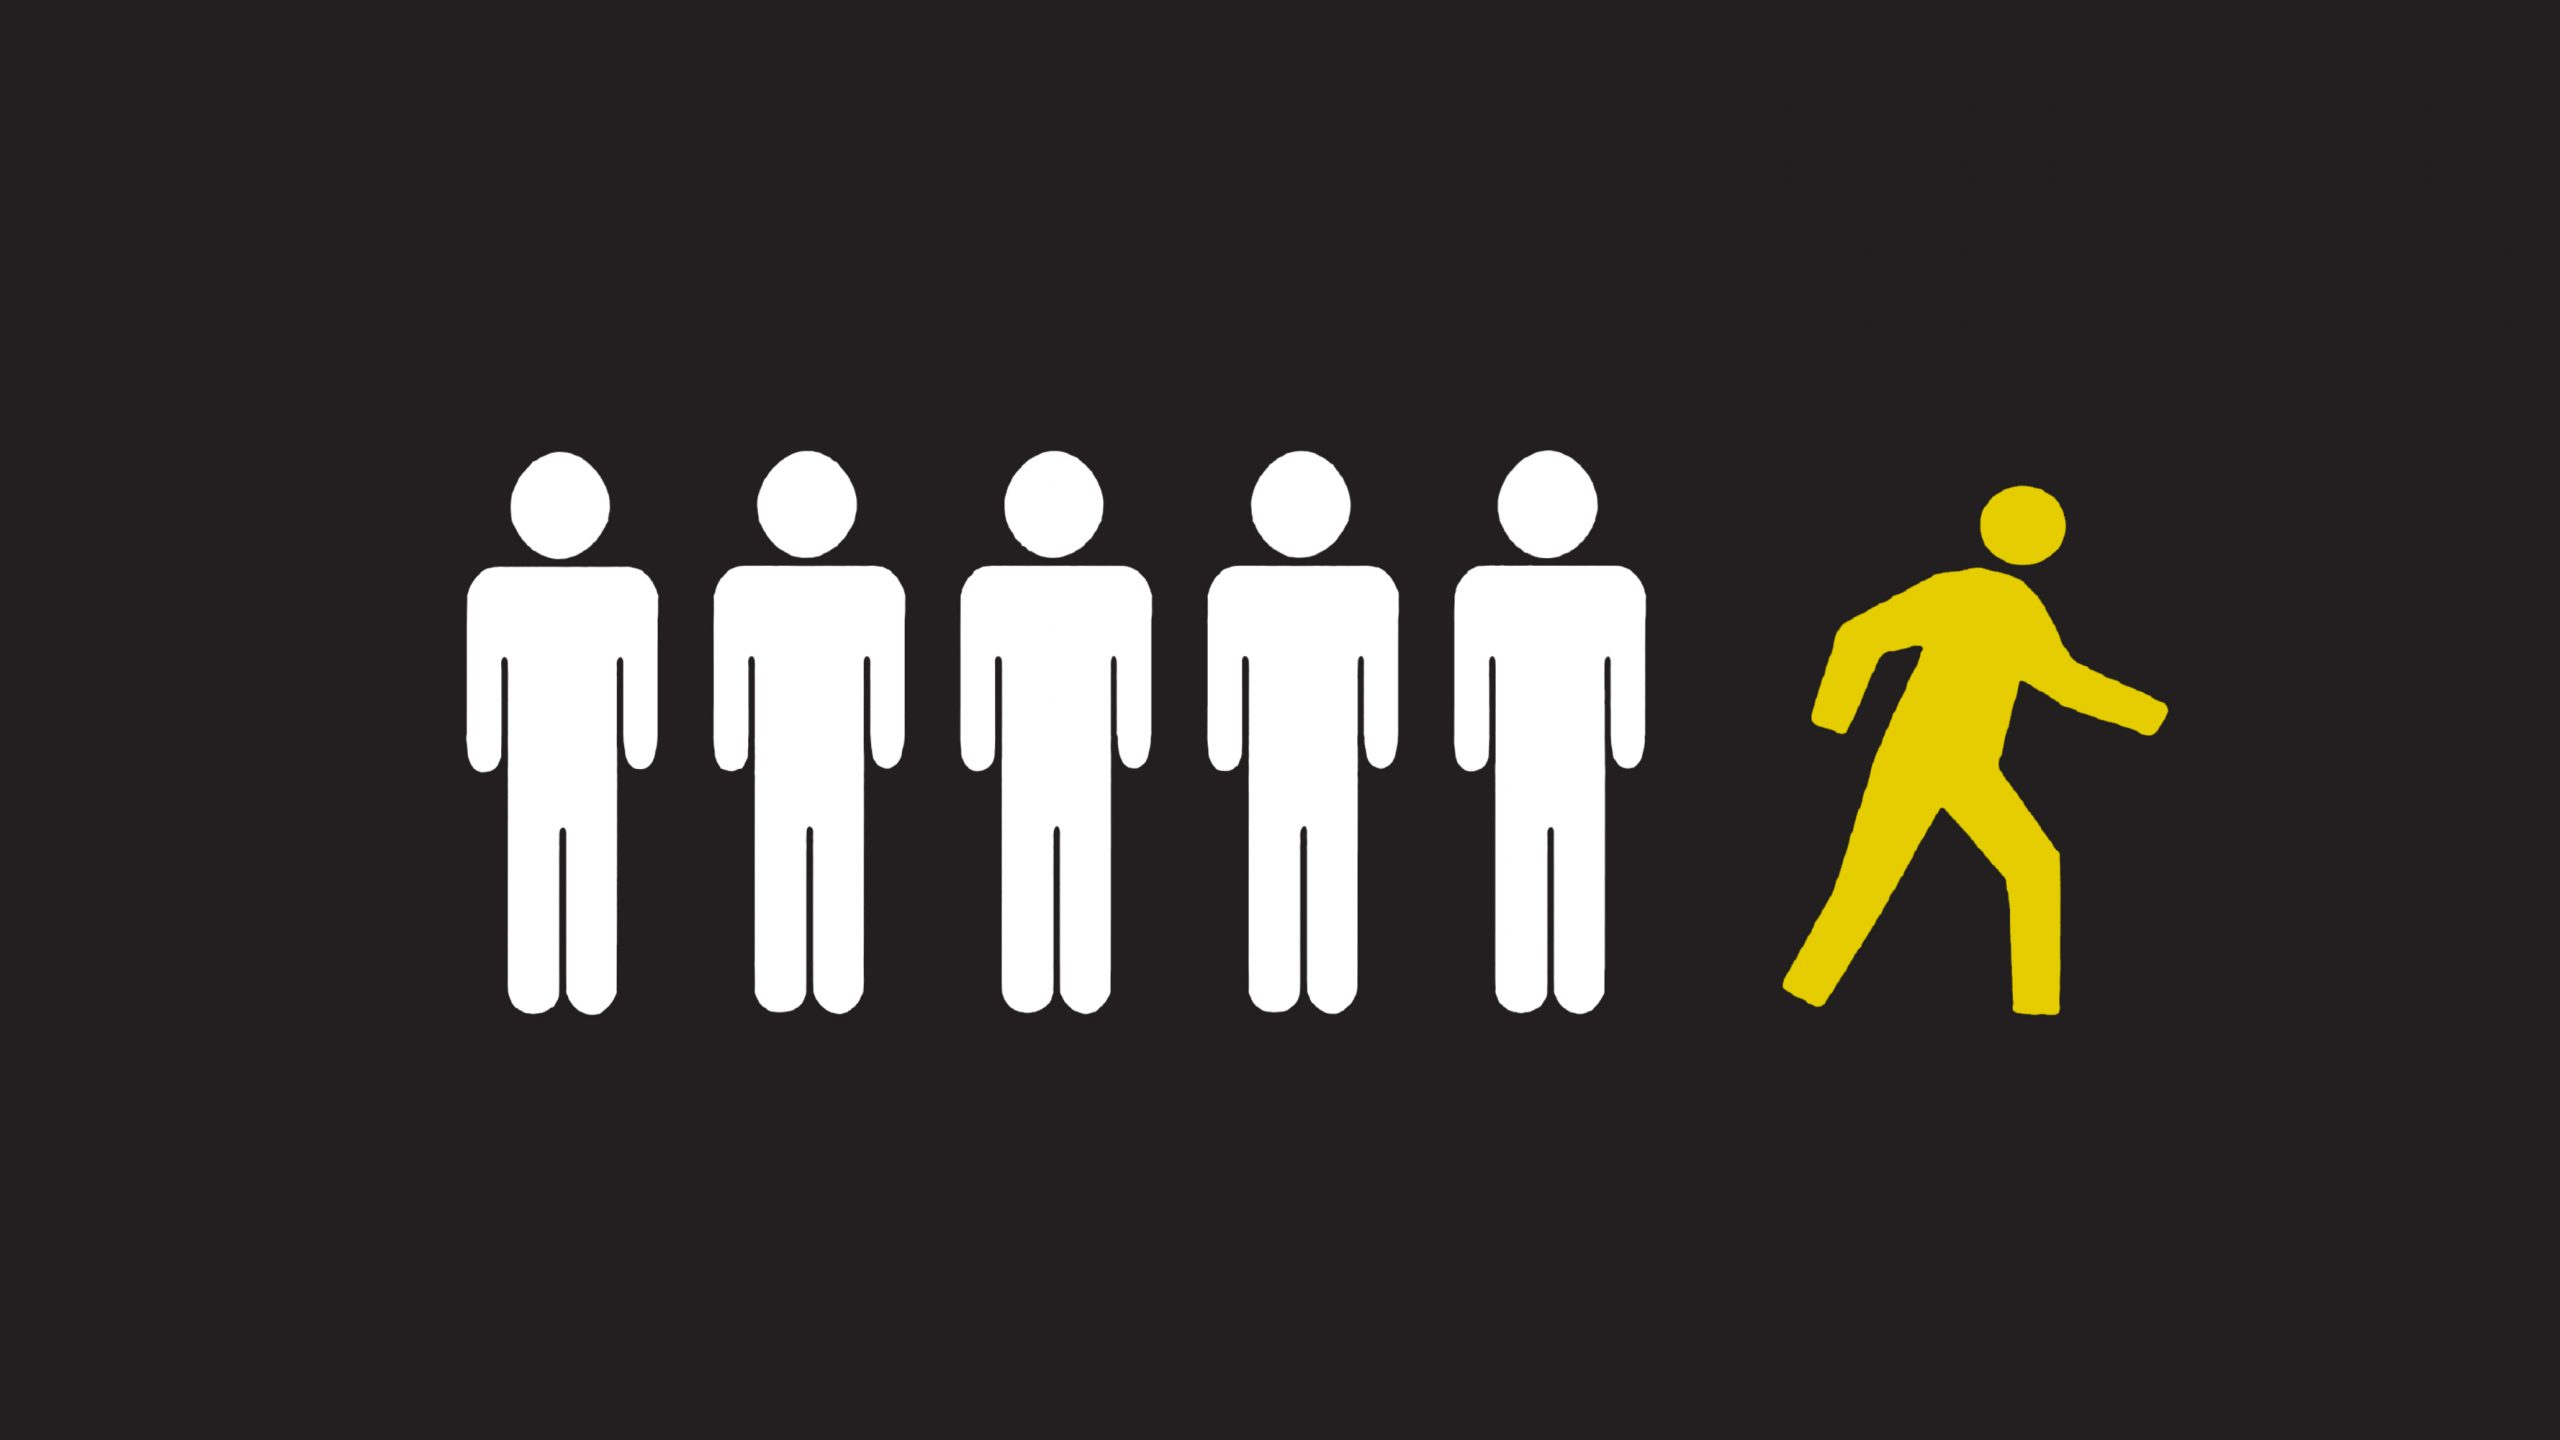

# **Origem dos Dados**

Os dados utilizados neste projeto foram originalmente disponibilizados na plataforma educacional da [IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#). Esses dados representam um cenário típico em uma empresa de telecomunicações. O conjunto de dados completo está acessível [aqui](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Embora as informações explícitas sejam limitadas, os nomes das colunas oferecem insights sobre a natureza do problema abordado.

In [85]:
# Importação de Bibliotecas Fundamentais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

# Ignorar Avisos
warnings.filterwarnings('ignore')

# Importação de Bibliotecas para Aprendizado de Máquina e Pré-Processamento
from sklearn.datasets import make_classification
from sklearn.model_selection import (
    cross_val_score, GridSearchCV, train_test_split, RepeatedKFold
)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Importação de Bibliotecas para Modelos de Classificação
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Importação de Bibliotecas para Balanceamento de Classes
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Importação de Bibliotecas para Métricas de Avaliação
from sklearn.metrics import (
    classification_report, roc_auc_score, roc_curve,
    accuracy_score, recall_score, precision_score
)


In [2]:
pip install scikit-plot

In [3]:
import scikitplot as skplt

In [4]:
# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

## **Análise dos Dados**

A fase de análise dos dados busca proporcionar uma compreensão aprofundada da estrutura subjacente dos dados.

**Dicionário das Variáveis**

- `customerID:` Identificador exclusivo do cliente.
- `gender:` Gênero do cliente (Masculino/Feminino).
- `SeniorCitizen:` Variável binária que indica se o cliente é idoso ou aposentado (1) ou não (0).
- `Partner:` Variável binária que indica se o cliente tem um parceiro (Sim) ou não (Não).
- `Dependents:` Variável binária que indica se o cliente possui dependentes (Sim) ou não (Não).
- `tenure:` Número de meses que o cliente tem sido assinante dos serviços da empresa.
- `PhoneService:` Variável binária que indica se o cliente possui serviço de telefone (Sim) ou não (Não).
- `MultipleLines:` Indica se o cliente tem várias linhas telefônicas (Sim), apenas uma linha (Não) ou se não possui serviço de telefone (Sem serviço de telefone).
- `InternetService:` Indica se o cliente tem serviço de internet por fibra óptica (Fibra óptica), DSL (DSL) ou não possui serviço de internet (Sem serviço).
- `OnlineSecurity:` Indica se o cliente tem segurança online (Sim), não possui serviço de internet (Sem serviço de internet) ou não possui serviço de segurança (Sem serviço).
- `OnlineBackup:` Indica se o cliente possui backup online (Sim), não possui backup (Não) ou não possui serviço de internet (Sem serviço de internet).
- `DeviceProtection:` Indica se o cliente possui proteção de dispositivo (Sim), não possui proteção (Não) ou não possui serviço de internet (Sem serviço de internet).
- `TechSupport:` Indica se o cliente possui suporte técnico (Sim), não possui suporte (Não) ou não possui serviço de internet (Sem serviço de internet).
- `StreamingTV:` Indica se o cliente possui serviço de streaming de TV (Sim), não possui serviço de streaming de TV (Não) ou não possui serviço de internet (Sem serviço de internet).
- `StreamingMovies:` Indica se o cliente possui serviço de streaming de filmes (Sim), não possui serviço de streaming de filmes (Não) ou não possui serviço de internet (Sem serviço de internet).
- `Contract:` Indica o tipo de contrato que o cliente possui com a empresa (Mensal, Anual ou Bienal).
- `PaperlessBilling:` Variável binária que indica se o cliente optou por fatura eletrônica (Sim) ou não (Não).
- `PaymentMethod:` Indica o método de pagamento utilizado pelo cliente (Transferência bancária automática, Cartão de crédito automático, Cheque eletrônico ou Cheque enviado).
- `MonthlyCharges:` Valor mensal cobrado ao cliente.
- `TotalCharges:` Valor total cobrado do cliente durante o período em que foi assinante.
- `Churn:` Variável binária que indica se o cliente cancelou o serviço (Sim) ou não (Não).

# **Análise Exploratória dos Dados (AED)**

A análise exploratória dos dados tem como objetivo proporcionar uma compreensão inicial das variáveis presentes no conjunto de dados. Nessa etapa, abordaremos os seguintes aspectos:

1. Contextualização geral das variáveis.
2. Percentual de valores ausentes.
3. Distribuição equilibrada dos dados.
4. Análise de cancelamentos por gênero.
5. Relação entre cancelamentos e valor mensal pago.
6. Visualização de variáveis numéricas por meio de boxplots.

Iniciaremos nossa exploração examinando o tamanho do dataframe e as cinco primeiras entradas do conjunto de dados, o que nos permitirá ter uma visão inicial de sua estrutura.

In [6]:
# Visualizando o tamanho do dataframe
print("Entradas: ", df.shape[0])
print("Variáveis: ", df.shape[1])

Entradas:  7043
Variáveis:  21


In [5]:
# Ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Extrair o nome das colunas
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Extrair o tipo das variáveis
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Notamos que a variável `TotalCharges`, que reflete o montante total cobrado do cliente, está atualmente classificada como tipo "**object**", mas deveria ser do tipo "**float**". No entanto, uma conversão direta não é viável devido à presença de valores vazios representados por strings em branco (' '). Portanto, essa transformação requer a aplicação de uma função dedicada.

 Converte uma string em um valor float.

In [9]:
def converter_str_float(entrada):

    try:
        return float(entrada)
    except ValueError:
        return np.nan

A função acima realiza a conversão de um valor do tipo string para um valor do tipo float.

- **Argumentos:**
    - `entrada`: Uma string contendo o valor a ser convertido. Especificamente, essa função foi projetada para lidar com a coluna "TotalCharges".

- **Retornos:**
    - Se a conversão for possível, a função retornará o valor convertido para float.
    - Se a conversão não for possível devido a um formato inadequado na string, a função retornará um valor especial "NaN" (Not a Number), indicando a falta de um valor apropriado.

In [10]:
df.TotalCharges = df.TotalCharges.map(converter_str_float)

In [11]:
df.TotalCharges.isna().sum()

11

A coluna foi convertida. Houve 11 valores ausentes que foram preenchidos com a mediana. Agora, vou extrair o tipo da variável e calcular a porcentagem de itens ausentes.

In [12]:
df.TotalCharges.fillna(df.TotalCharges.median(), inplace = True)

In [13]:
# Extrair o tipo das variáveis
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Agora é evidente que a coluna "TotalCharges" foi convertida para o tipo float.

In [14]:
# Porcentagem de itens nulos
round((df.isnull().sum()/df.shape[0]).sort_values(ascending = True) * 100,2)

customerID          0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
DeviceProtection    0.0
TotalCharges        0.0
OnlineBackup        0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
gender              0.0
OnlineSecurity      0.0
Churn               0.0
dtype: float64

A análise revela que a porcentagem de valores ausentes em todas as colunas é 0%.

In [15]:
# Quantidade de dados distribuidos por classes
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
# Porcentagem de dados distribuidos por classes
round(df.Churn.value_counts()/df.shape[0] * 100,4)

No     73.463
Yes    26.537
Name: Churn, dtype: float64

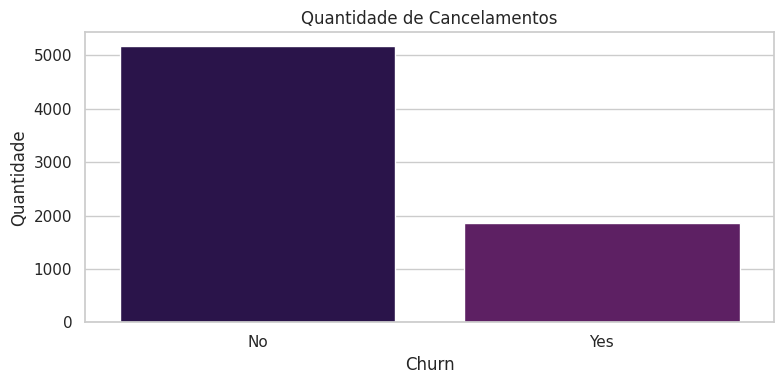

In [25]:
# Plotar um gráfico de barras para visualizar o balanceamento do conjunto de dados
fig, ax = plt.subplots(figsize=(8, 4))
sns.set(style="whitegrid", palette="inferno")
count = df['Churn'].value_counts()
sns.countplot(x='Churn', data=df)
ax.set_xlabel('Churn')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Cancelamentos')
plt.tight_layout()



O conjunto de dados apresenta um desequilíbrio, com uma taxa de churn de 26,53%. Isso pode resultar em um modelo enviesado, favorecendo a classe majoritária. Portanto, é crucial realizar um balanceamento para desenvolver um modelo eficaz para esse problema. A seguir, vamos avaliar se há equilíbrio entre os gêneros e se existe alguma relação entre o gênero e o cancelamento.

In [22]:
# Quantidade de dados distribuidos por classes
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [21]:
# Porcentagem de dados distribuidos por classes
round(df.gender.value_counts()/df.shape[0] * 100,4)

Male      50.4756
Female    49.5244
Name: gender, dtype: float64

In [23]:
# Taxa de cancelamento por gênero
df['gender'].loc[df.Churn == 'Yes'].value_counts()/df.gender.value_counts() * 100

Female    26.920872
Male      26.160338
Name: gender, dtype: float64

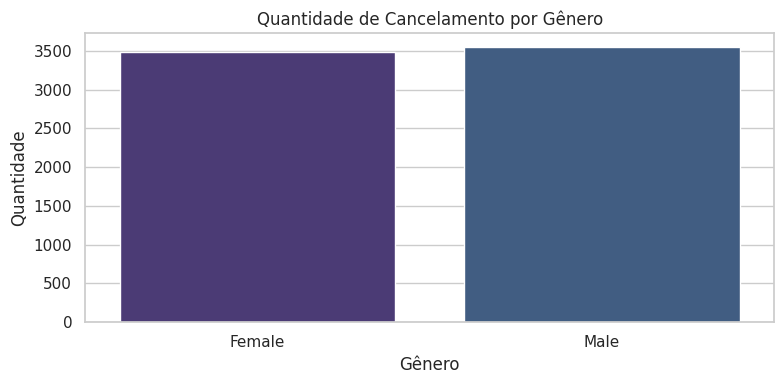

In [43]:
# Plotar um gráfico de barras para ver a quantidade de cancelamento por gênero
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette("viridis")  # Ajustei a paleta de cores para "viridis"
count = df['gender'].loc[df.Churn == 'Yes'].value_counts()
sns.countplot(x='gender', data=df)
ax.set_xlabel('Gênero')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Cancelamento por Gênero')
plt.tight_layout()



As medidas são bastante semelhantes. A quantidade de mulheres e homens está balanceada, e não há uma mudança significativa na taxa de cancelamento ao observar o gênero do cliente. Agora, vamos explorar se existe alguma relação entre o tipo de contrato e a quantidade de cancelamentos.

In [45]:
df.Contract.loc[df.Churn == 'Yes'].value_counts()/df.Contract.value_counts() * 100


Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Contract, dtype: float64

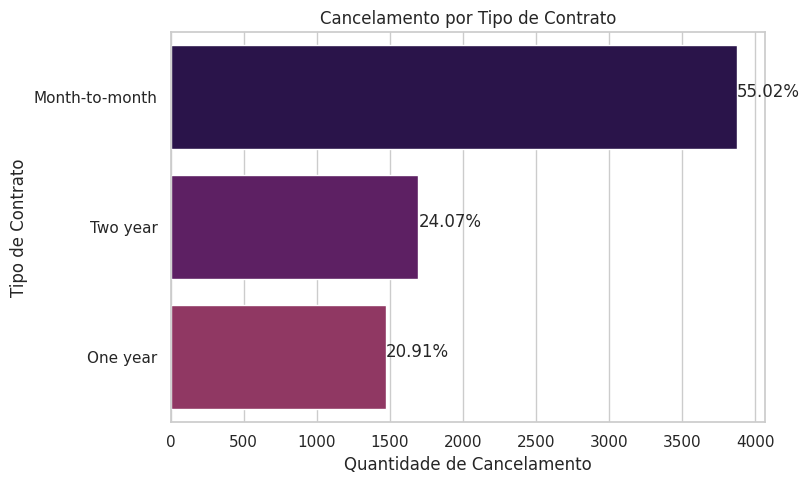

In [56]:
# Plotar gráfico para as informações obtidas
plt.figure(figsize=(8, 5))

# Define informações iniciais referentes à coloração
sns.set(style="whitegrid")
sns.set_palette("inferno")

# Gráfico da quantidade de cancelamento por tipo de contrato
ax = sns.barplot(
    x=list(df.Contract.value_counts().values),
    y=list(df.Contract.value_counts().index),
    order=df.Contract.value_counts().sort_values(ascending=False).index
)
ax.set_xlabel('Quantidade de Cancelamento')
ax.set_ylabel('Tipo de Contrato')
ax.set_title("Cancelamento por Tipo de Contrato")
plt.tight_layout()

# Adicionar porcentagens nas barras
total = sum(df.Contract.value_counts().values)
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.2f}%'
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

plt.show()



É possível observar que, em geral, os contratos mensais apresentam uma maior taxa de evasão em comparação com os contratos anuais e bianuais, que exibem uma quantidade semelhante de evasão. A seguir, apresentamos um histograma para analisar a frequência das cobranças mensais quando ocorre cancelamento e quando não ocorre.

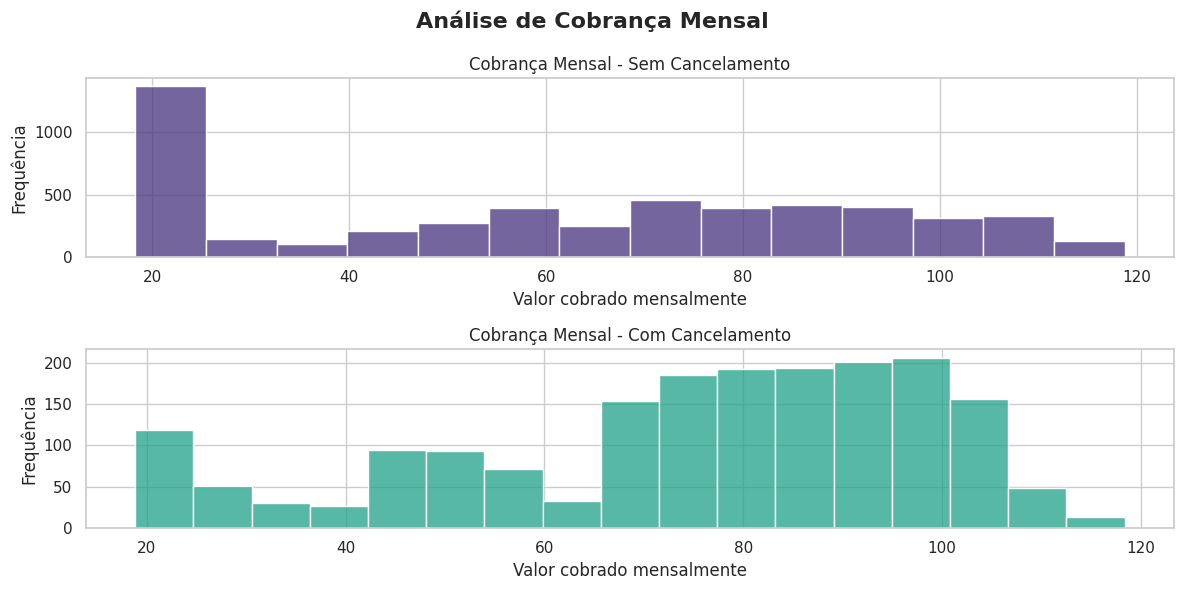

In [62]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("viridis")  # Ajustei a paleta de cores para "viridis"

sns.histplot(data=df.MonthlyCharges.loc[df.Churn == 'No'], kde=False, ax=ax[0], color=sns.color_palette()[0])
sns.histplot(data=df.MonthlyCharges.loc[df.Churn == 'Yes'], kde=False, ax=ax[1], color=sns.color_palette()[3])

ax[0].set_xlabel('Valor cobrado mensalmente')
ax[0].set_ylabel('Frequência')
ax[0].set_title('Cobrança Mensal - Sem Cancelamento')

ax[1].set_xlabel('Valor cobrado mensalmente')
ax[1].set_ylabel('Frequência')
ax[1].set_title('Cobrança Mensal - Com Cancelamento')

fig.suptitle("Análise de Cobrança Mensal", fontsize=16, fontweight='bold')
plt.tight_layout()



De maneira geral, podemos concluir que quando ocorre cancelamento, os valores cobrados mensalmente tendem a ser maiores. Isso pode ocorrer por diversas razões, como:

1. Insatisfação com o produto ou serviço: Quando o cliente não está satisfeito com o que a empresa oferece, pode optar pelo cancelamento e buscar um concorrente.

2. Mudança na situação financeira: Problemas financeiros podem levar o cliente a reduzir despesas, inclusive cancelando serviços considerados menos essenciais.

3. Ofertas melhores da concorrência: Se o cliente encontra produtos ou serviços similares com preços mais baixos ou melhores condições em outras empresas, ele pode optar por cancelar e migrar.

Portanto, o valor mensal da mensalidade é uma variável relevante.

A variável "SeniorCitizen" indica se o cliente é idoso ou aposentado. A variável "tenure" refere-se à quantidade de meses em que o cliente foi assinante dos serviços da empresa. A variável "MonthlyCharges" está relacionada ao valor mensal pago pelo cliente, enquanto "TotalCharges" refere-se ao valor total pago durante o período de assinatura. A seguir, apresentamos um gráfico de boxplot que fornecerá algumas informações estatísticas sobre essas variáveis.

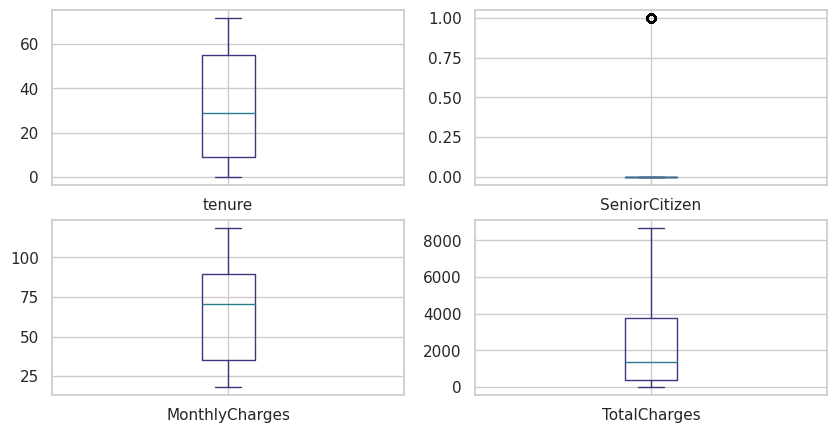

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(10,5))
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]
df.tenure.plot(kind = "box", ax = ax1)
df.SeniorCitizen.plot(kind = "box", ax = ax2)
df.MonthlyCharges.plot(kind = "box", ax = ax3)
df.TotalCharges.plot(kind = "box", ax = ax4);

Estatisticamente, não foram identificados outliers nas variáveis ou qualquer informação discrepante. O tempo médio de uso do produto pelo usuário foi de cerca de 30 meses, enquanto a mensalidade média foi de 70 unidades monetárias e o valor total pago atingiu 1397 unidades monetárias. Esses dados estão em conformidade com as expectativas e apresentam coerência.

**Preparação dos Dados**

Nesta etapa de preparação dos dados, vamos realizar um pré-processamento básico com o objetivo de construir um modelo base.

Iniciaremos processando as características que possuem apenas 2 rótulos únicos, utilizando o `LabelEncoder`. Esse processo também será aplicado à variável "Contract", que se mostrou relevante. Posteriormente, faremos a separação entre as variáveis numéricas e as categóricas. As variáveis categóricas serão transformadas em variáveis "dummy" para que possam ser utilizadas em todos os modelos. O `Label Encoding` atribui um número inteiro a cada categoria exclusiva de uma variável categórica, com valores maiores para categorias que são consideradas mais importantes. Por sua vez, o `Dummy Encoding` transforma cada categoria única de uma variável categórica em uma nova variável binária (0 ou 1), indicando a presença ou ausência dessa categoria na observação.

Vamos remover a variável "customerID", uma vez que se trata apenas de um número de identificação e não agrega relevância ao modelo. Também eliminaremos a variável "gender", pois não demonstrou relevância em relação à variável alvo.

In [64]:
# remover customerID e gender
df_clean = df.drop('customerID', axis = 1)
df_clean = df_clean.drop('gender', axis = 1)
df_clean.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
# Cria o LabelEncoder
le = LabelEncoder()

cols_to_encode = ['SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'Churn']

# Itera sobre as colunas selecionadas e aplica o encoder
for col in cols_to_encode:
    df_clean[col] = le.fit_transform(df_clean[col])

# Imprime o dataframe com as colunas codificadas
df_clean[['SeniorCitizen','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'Churn']].head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Contract,Churn
0,0,1,0,0,1,0,0
1,0,0,0,1,0,1,0
2,0,0,0,1,1,0,1
3,0,0,0,0,0,1,0
4,0,0,0,1,1,0,1


In [66]:
# Seleciona as colunas a serem codificadas como dummy
cols_to_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'PaymentMethod']

# Aplica o get_dummies() em cada coluna selecionada
df_dummies = pd.get_dummies(df_clean[cols_to_encode], prefix=cols_to_encode)

# Concatena as variáveis dummy com o dataframe original
df_clean = pd.concat([df_clean, df_dummies], axis=1)

# Remove as colunas originais
df_clean.drop(cols_to_encode, axis=1, inplace=True)

In [ ]:
df_clean.columns

In [67]:
df_clean.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,1,0,56.95,1889.50,0,...,1,0,0,1,0,0,0,0,0,1
2,0,0,0,2,1,0,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,1,0,42.30,1840.75,0,...,1,0,0,1,0,0,1,0,0,0
4,0,0,0,2,1,0,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


## **Modelo de Machine Learning**

Com o pré-processamento realizado na etapa anterior, os dados estão prontos para serem utilizados nos modelos de machine learning. Antes de realizar a padronização dos dados, realizarei a separação do conjunto de teste, que será usado para validar a eficácia do modelo. É crucial que o modelo possa generalizar bem para evitar problemas como o underfitting, que ocorre quando o modelo tem um desempenho baixo tanto no treinamento quanto na validação, ou o overfitting, que ocorre quando o modelo se ajusta excessivamente aos dados de treinamento e não consegue generalizar para novos dados. A separação prévia à padronização assegura que os dados de teste não tenham contato com os de treinamento e validação, reproduzindo uma situação do mundo real.

Existem diversos métodos de divisão de dados disponíveis para mitigar esses problemas. No presente caso, adotaremos a proporção de 70/15/15 para os conjuntos de treinamento, validação e teste, respectivamente.

**Separando o Conjunto de Teste**

In [68]:
# criando o conjunto de teste
test = df_clean.sample(frac=0.15, random_state=0)

# verificando o conjunto
print(test.shape)
test.head()

(1056, 38)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,0,0,0,19,1,1,0,58.20,1045.25,0,...,0,0,1,1,0,0,0,0,1,0
4627,0,0,0,60,1,1,1,116.60,7049.50,0,...,0,0,1,0,0,1,0,1,0,0
3225,0,0,0,13,1,0,1,71.95,923.85,0,...,0,0,1,0,0,1,0,0,1,0
2828,0,0,0,1,1,2,0,20.45,20.45,0,...,0,1,0,0,1,0,0,0,0,1
3768,0,1,0,55,1,0,1,77.75,4266.40,0,...,1,0,0,1,0,0,0,1,0,0


In [69]:
# drop das linhas de teste
df_clean = df_clean.drop(test.index)

# verificando o shape do df
df_clean.shape

(5987, 38)

In [70]:
# resetando o index dos conjuntos
df_clean.reset_index()
test.reset_index()

,index,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2200,0,0,0,19,1,1,0,58.20,1045.25,...,0,0,1,1,0,0,0,0,1,0
1,4627,0,0,0,60,1,1,1,116.60,7049.50,...,0,0,1,0,0,1,0,1,0,0
2,3225,0,0,0,13,1,0,1,71.95,923.85,...,0,0,1,0,0,1,0,0,1,0
3,2828,0,0,0,1,1,2,0,20.45,20.45,...,0,1,0,0,1,0,0,0,0,1
4,3768,0,1,0,55,1,0,1,77.75,4266.40,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,2229,0,1,0,4,1,0,0,70.50,294.20,...,1,0,0,1,0,0,0,0,1,0
1052,5109,0,1,1,66,1,2,0,65.85,4097.05,...,1,0,0,1,0,0,0,0,0,1
1053,5365,0,0,1,62,1,2,0,20.00,1250.10,...,0,1,0,0,1,0,1,0,0,0
1054,3903,0,0,0,53,1,0,1,80.60,4348.10,...,1,0,0,1,0,0,0,0,0,1


## **Padronização de tenure, MonthlyCharges e TotalCharges**

O objetivo do pré-processamento de dados é assegurar que as características estejam na mesma escala, o que contribui para um melhor desempenho dos algoritmos de machine learning. Para padronizar as variáveis "tenure", "MonthlyCharges" e "TotalCharges", utilizaremos o `StandardScaler`. Esse método ajusta os dados de forma que eles tenham uma média zero e um desvio padrão de um.

In [71]:
# padronizar as colunas tenure, MonthlyCharges e TotalCharges
df_new = df_clean.copy()
std_scaler = StandardScaler()
df_new['std_tenure'] = std_scaler.fit_transform(df_clean['tenure'].values.reshape(-1, 1))
df_new['std_MonthlyCharges'] = std_scaler.fit_transform(df_clean['MonthlyCharges'].values.reshape(-1, 1))
df_new['std_TotalCharges'] = std_scaler.fit_transform(df_clean['TotalCharges'].values.reshape(-1, 1))
df_new.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)

# ver as primeiras entradas
df_new.head()

,SeniorCitizen,Partner,Dependents,PhoneService,Contract,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,std_tenure,std_MonthlyCharges,std_TotalCharges
0,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.273120,-1.167925,-0.992987
1,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0.070187,-0.264396,-0.171312
2,0,0,0,1,0,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.232414,-0.367752,-0.958391
3,0,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0.517956,-0.752835,-0.192852
4,0,0,0,1,0,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.232414,0.194036,-0.939171


**Conjunto de Treinamento e Validação**

Após a correta separação do conjunto de teste e a padronização dos dados, procederemos à criação do conjunto de treinamento e validação. Utilizaremos o conjunto de teste para avaliar o desempenho do modelo ao final do processo de treinamento e ajuste.

In [72]:
# separar variáveis entre X e y
X = df_new.drop('Churn', axis=1)
y = df_new['Churn'] # variável alvo

# dividir o dataset entre treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size = 0.15)

## **Balanceamento de Dados: Amostragem**

Quando mais de 50% das entradas de um conjunto de dados pertencem a uma única classe, consideramos o conjunto desbalanceado. A maioria dos algoritmos de aprendizado de máquina funciona melhor com conjuntos de dados equilibrados, pois eles buscam otimizar a precisão geral da classificação ou medidas relacionadas. No caso de dados desbalanceados, os algoritmos tendem a ter limites de decisão inclinados em direção à classe majoritária, levando a classificações incorretas da classe minoritária.

Para abordar esse problema, utilizamos técnicas de amostragem, incluindo o oversampling e o undersampling. O oversampling envolve a geração de novos exemplos para a classe minoritária, aumentando sua representação no conjunto de dados. Por outro lado, o undersampling remove instâncias da classe majoritária.

Contudo, esses métodos de amostragem têm desvantagens (Weiss, 2004). O undersampling descarta exemplos da classe majoritária que podem ser úteis, prejudicando o desempenho do classificador. O oversampling, ao introduzir mais casos de treinamento, pode aumentar o tempo de construção do classificador e levar ao overfitting.

Além disso, o oversampling simples não cria novos dados, apenas replica os existentes, não abordando adequadamente a "falta de dados". A literatura mostra que o oversampling simples não melhora significativamente o reconhecimento da classe minoritária (Ling & Li, 1998; Drummond & Holte, 2003), e o undersampling parece ter vantagens sobre o oversampling (Chen et al., 2004). Portanto, neste estudo, optamos pelo undersampling.

Também usaremos vários modelos de classificação em machine learning, como Regressão Logística, KNeighbors, Árvore de Decisão, Random Forest, Support Vector Machine e XGBoost. Utilizaremos a técnica de "Random Under Sampling", que realiza o undersampling aleatoriamente, e testaremos esses modelos com essa técnica.

## **RandomUnderSampler**

O RandomUnderSampler é uma técnica de undersampling utilizada para lidar com conjuntos de dados desbalanceados, onde uma classe tem muito menos amostras do que as outras. A ideia do undersampling é reduzir o número de amostras da classe majoritária para equilibrar as proporções entre as classes. O RandomUnderSampler é uma técnica simples que remove aleatoriamente amostras da classe majoritária até que o número de amostras na classe majoritária corresponda ao número de amostras da classe minoritária. Essa abordagem pode efetivamente reduzir o viés do modelo em relação à classe majoritária e melhorar a precisão das previsões para a classe minoritária.

In [74]:
# instanciando o RandomUnderSampler
rus = RandomUnderSampler(random_state=42, sampling_strategy="majority")

# aplicando o RandomUnderSampler ao conjunto de dados
X_under, y_under = rus.fit_resample(X_train, y_train)

Nas etapas anteriores, criamos um objeto para o RandomUnderSampler e realizamos o balanceamento dos dados. Utilizamos a estratégia de amostragem "majority", que consiste em remover apenas instâncias da classe majoritária. Agora, vamos observar o tamanho original da variável alvo e o tamanho após o balanceamento.

In [75]:
# Visualizando o tamanho do conjunto de treinamento
print("Tamanho do y_train:", np.shape(y_train))

# Visualizando o tamanho do conjunto balanceado
print("Tamanho do y_resampled:", np.shape(y_under))

Tamanho do y_train: (5088,)
Tamanho do y_resampled: (2726,)


In [76]:
# ver o balanceamento das classes
print(pd.Series(y_under).value_counts())

0    1363
1    1363
Name: Churn, dtype: int64


É perceptível que diversas linhas foram removidas para alcançar o balanceamento dos dados. Vamos agora analisar a nova distribuição.

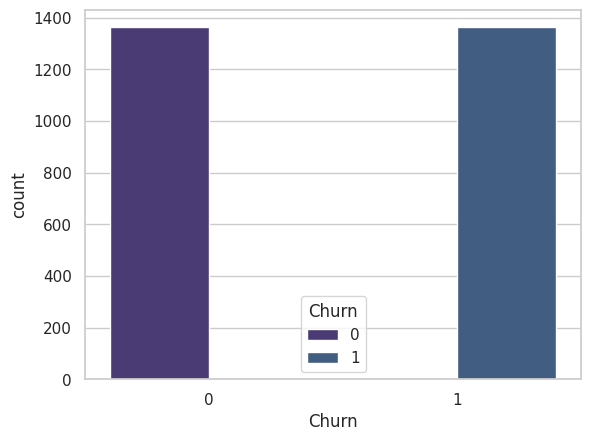

In [77]:
# plotar a nova distribuição de classes
sns.countplot(x=y_under, hue=y_under);

## **Treinamento dos Algoritmos de Machine Learning**

Nesta fase, iremos treinar diversos algoritmos de Machine Learning. Para avaliar a eficácia do treinamento, utilizaremos várias métricas comuns para modelos de classificação, como matriz de confusão, acurácia, recall, precisão e AUC. Daremos prioridade ao recall, que representa a proporção de exemplos positivos corretamente classificados em relação a todos os exemplos positivos.

Vamos instanciar objetos dos seguintes algoritmos e, em seguida, treiná-los usando validação cruzada para determinar qual deles apresenta o maior recall:

1. **Regressão Logística:** Um algoritmo simples e eficaz baseado em regressão linear, adaptado para problemas de classificação binária.

2. **k-Nearest Neighbors (k-NN):** Um algoritmo baseado em instância que classifica um objeto com base na classe majoritária de seus k vizinhos mais próximos.

3. **Árvores de Decisão:** Algoritmos que constroem uma árvore de decisão com base nos atributos dos dados de treinamento, permitindo classificações rápidas e interpretação visual do processo de decisão.

4. **Random Forest:** Um método de conjunto que constrói várias árvores de decisão e combina suas previsões para obter uma classificação mais precisa e robusta.

5. **Support Vector Machines (SVM):** Um algoritmo que busca encontrar o hiperplano que melhor separa as classes no espaço de características, maximizando a margem entre as classes.

**XGBoost (Extreme Gradient Boosting):** O XGBoost é uma biblioteca de Machine Learning que implementa a técnica de Gradient Boosting. Essa técnica baseia-se em construir modelos de forma iterativa, adicionando novos modelos que corrigem os erros dos modelos anteriores.

In [81]:
from sklearn.tree import DecisionTreeClassifier

# Instanciação dos classificadores
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svc = SVC()
xgboost = XGBClassifier()


**Validação Cruzada (Cross-Validation)**

A validação cruzada é uma técnica fundamental que nos permite avaliar o desempenho do modelo de maneira robusta. Ela envolve a divisão dos dados em k partições (folds), onde o modelo é treinado em k-1 partições e avaliado na partição restante, repetindo esse processo k vezes. A validação cruzada nos auxilia a estimar o desempenho do modelo em dados não vistos, evitando problemas de sobreajuste (overfitting) ou subajuste (underfitting).

No nosso caso, optamos pela técnica de 5x2 CV com base no paper "Handling class imbalance in customer churn prediction", disponível neste link. Essa técnica consiste em realizar cinco iterações de validação cruzada, cada uma dividindo os dados em dois folds. Em cada iteração, uma metade dos dados é fornecida aos algoritmos para treinamento, enquanto a outra metade é usada para avaliar a solução final; e vice-versa. Essa abordagem contribui para uma avaliação mais robusta do desempenho do modelo diante de um conjunto diversificado de dados.

In [82]:
# criação dos classificadores
classifiers = [
    ('Logistic Regression', logistic_regression),
    ('K-Nearest Neighbors', knn),
    ('Decision Tree', decision_tree),
    ('Random Forest', random_forest),
    ('Support Vector Machines', svc),
    ('XGBoost', xgboost)
]

recall = []
model = []

# validação cruzada de dois folders com 5 repetições
cv = RepeatedKFold(n_splits=2, n_repeats=5, random_state=42)


X_under_np = X_under.to_numpy()
y_under_np = y_under.to_numpy()

for name, clf in classifiers:
    scores = []

    # Realiza a validação cruzada
    for train_index, test_index in cv.split(X_under_np, y_under_np):
        # Dados são divididos em treino e teste
        X_train, X_test = X_under_np[train_index], X_under_np[test_index]
        y_train, y_test = y_under_np[train_index], y_under_np[test_index]

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        # Recall é calculado e adicionado à lista de pontuações
        recall_iter = recall_score(y_test, y_pred, average='macro')
        scores.append(recall_iter)

    recall.append(np.mean(scores))
    model.append(name)

recall_sorted, model_sorted = zip(*sorted(zip(recall, model), reverse=True))
pd.DataFrame(data=recall_sorted, index=model_sorted, columns=['Recall'])

,Recall
Logistic Regression,0.764496
Support Vector Machines,0.754897
Random Forest,0.748465
K-Nearest Neighbors,0.734080
XGBoost,0.732571
Decision Tree,0.679411


No código acima, realizamos a validação cruzada com a técnica 5x2 conforme explicado anteriormente. Calculamos a média do recall para cada algoritmo e observamos que os algoritmos com melhor recall foram o Logistic Regression e o SVM, respectivamente. Agora, vamos avançar para a otimização dos hiperparâmetros para obter resultados ainda mais satisfatórios.

## **Otimização dos Hiperparâmetros - Logistic Regression e Support Vector Machines**

Uma abordagem comum para otimizar os hiperparâmetros é utilizar o `GridSearchCV` do scikit-learn. O `GridSearchCV` é uma ferramenta poderosa que permite testar várias combinações de hiperparâmetros para um modelo, treinando e avaliando cada combinação para encontrar a melhor configuração de hiperparâmetros para o conjunto de dados específico.

Nós usaremos o `GridSearchCV` para explorar e encontrar os melhores hiperparâmetros para os modelos de Machine Learning selecionados. Isso nos ajudará a afinar os modelos e obter um desempenho ainda mais otimizado.

In [84]:
from sklearn.metrics import make_scorer


# Hiperparâmetros a serem otimizados
logreg_params = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

svc_params = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf']
}


logreg = LogisticRegression(random_state=42)
svc = SVC(random_state=42)

# objeto GridSearchCV para cada modelo
recall_scorer = make_scorer(recall_score, average='macro')
grid_logreg = GridSearchCV(logreg, logreg_params, scoring=recall_scorer, cv=5, n_jobs=-1)
grid_svc = GridSearchCV(svc, svc_params, scoring=recall_scorer, cv=5, n_jobs=-1)

# treina os modelos usando GridSearchCV
grid_logreg.fit(X_under, y_under)
grid_svc.fit(X_under, y_under)

# melhores hiperparâmetros encontrados
best_logreg_params = grid_logreg.best_params_
best_svc_params = grid_svc.best_params_

print("Melhores hiperparâmetros para Logistic Regression:", best_logreg_params)
print("Melhores hiperparâmetros para Support Vector Machines:", best_svc_params)

# treina os modelos
best_logreg = LogisticRegression(**best_logreg_params, random_state=42)
best_svc = SVC(**best_svc_params, random_state=42)

best_logreg.fit(X_under, y_under)
best_svc.fit(X_under, y_under)

Melhores hiperparâmetros para Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Melhores hiperparâmetros para Support Vector Machines: {'C': 1.0, 'kernel': 'rbf'}


SVC(random_state=42)

Os melhores hiperparâmetros encontrados através do GridSearch foram:

**Logistic Regression**: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
**Support Vector Machines**: {'C': 1.0, 'kernel': 'rbf'}

Os modelos foram treinados. A seguir, realizaremos previsões no conjunto de teste e calcularemos métricas de avaliação.

# Logistic Regression

In [87]:
from sklearn.metrics import average_precision_score

# previsões no conjunto de teste
y_pred_logreg = best_logreg.predict(X_test)

# métricas de avaliação para o modelo de Regressão Logística
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
avg_precision_logreg = average_precision_score(y_test, y_pred_logreg)

print("Métricas de avaliação do modelo de Regressão Logística:")
print("Acurácia: {:.2f}".format(accuracy_logreg))
print("Precisão: {:.2f}".format(precision_logreg))
print("Recall: {:.2f}".format(recall_logreg))
print("ROC AUC: {:.2f}".format(roc_auc_logreg))

Métricas de avaliação do modelo de Regressão Logística:
Acurácia: 0.75
Precisão: 0.73
Recall: 0.78
ROC AUC: 0.75


Quando se trata de dados desbalanceados, a acurácia pode não ser a métrica mais adequada para avaliar o desempenho do modelo. No entanto, obtivemos uma acurácia de 0.75, o que significa que o modelo acertou 75% dos conjuntos de teste. A precisão, que representa a proporção de verdadeiros positivos em relação à soma de verdadeiros positivos e falsos positivos, foi de 0.73. Já o recall, que mede a proporção de verdadeiros positivos em relação à soma de verdadeiros positivos e falsos negativos, foi de 0.8. O recall é a métrica mais relevante nesse cenário, uma vez que o cancelamento de clientes apresenta um impacto real para a empresa. O modelo apresentou um bom desempenho nesse aspecto, com um valor de 0.8. A área sob a curva ROC (ROC AUC) também é uma métrica importante, representando a capacidade do modelo de distinguir entre as classes positivas e negativas. Neste caso, o valor da ROC AUC é de 0.75 (75%), indicando que o modelo tem um bom poder discriminativo.

Agora, vamos plotar a matriz de confusão para visualizar os resultados obtidos.

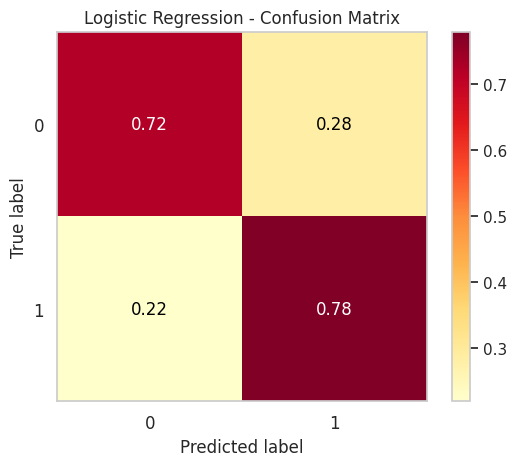

In [88]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_logreg, normalize=True, cmap='YlOrRd')
plt.title("Logistic Regression - Confusion Matrix");

## Support Vector Machines

In [89]:
# previsões no conjunto de teste
y_pred_svc = best_svc.predict(X_test)

# Calcule as métricas de avaliação para o modelo SVM
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
roc_auc_svc = roc_auc_score(y_test, y_pred_svc)
avg_precision_svc = average_precision_score(y_test, y_pred_svc)

print("\nMétricas de avaliação do modelo SVM:")
print("Acurácia: {:.2f}".format(accuracy_svc))
print("Precisão: {:.2f}".format(precision_svc))
print("Recall: {:.2f}".format(recall_svc))
print("ROC AUC: {:.2f}".format(roc_auc_svc))


Métricas de avaliação do modelo SVM:
Acurácia: 0.77
Precisão: 0.76
Recall: 0.79
ROC AUC: 0.77


Utilizando o modelo Support Vector Machines, alcançamos uma acurácia de 0.77, o que significa que o modelo acertou 77% do conjunto de teste. A precisão foi de 76%, enquanto o recall foi de 79%, valores semelhantes ao modelo de Regressão Logística. A métrica de ROC AUC foi de 0.77, indicando uma boa capacidade do modelo de distinguir entre as classes positivas e negativas. De maneira geral, o modelo apresentou um desempenho satisfatório. Vamos agora plotar a matriz de confusão para visualizar os resultados obtidos utilizando o modelo SVM.

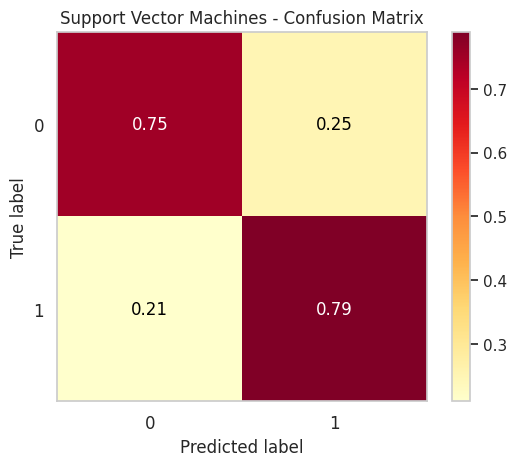

In [90]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svc, normalize=True, cmap='YlOrRd')
plt.title("Support Vector Machines - Confusion Matrix");

# Avaliação do Modelo com os Dados de Teste

No início do projeto, dividimos os dados em três conjuntos: treinamento, validação e teste. Agora que exploramos e preparamos os dados, treinamos os modelos e fizemos previsões no conjunto de validação, é o momento de avaliar o desempenho desses modelos utilizando os dados de teste.

Padronização no Conjunto de Teste

Antes de realizarmos a avaliação nos classificadores, precisamos padronizar os dados de teste, de maneira semelhante ao processo feito com os dados de treinamento. Vamos utilizar o `StandardScaler` para esse propósito. Em seguida, iremos separar os dados em `X_test` e `y_test`, onde `y_test` representará a variável alvo.

In [91]:
# padronizar as colunas Tenure, MonthlyCharges e TotalCharges
std_scaler = StandardScaler()
test['std_tenure'] = std_scaler.fit_transform(test['tenure'].values.reshape(-1, 1))
test['std_MonthlyCharges'] = std_scaler.fit_transform(test['MonthlyCharges'].values.reshape(-1, 1))
test['std_TotalCharges'] = std_scaler.fit_transform(test['TotalCharges'].values.reshape(-1, 1))
test.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1, inplace=True)

# ver as primeiras entradas
test.head()

,SeniorCitizen,Partner,Dependents,PhoneService,Contract,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,std_tenure,std_MonthlyCharges,std_TotalCharges
2200,0,0,0,1,1,0,0,1,0,0,...,1,0,0,0,0,1,0,-0.567775,-0.192426,-0.555174
4627,0,0,0,1,1,1,0,0,0,1,...,0,0,1,0,1,0,0,1.105521,1.715511,2.083496
3225,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,-0.812648,0.256789,-0.608525
2828,0,0,0,1,2,0,0,1,0,0,...,0,1,0,0,0,0,1,-1.302393,-1.425725,-1.005540
3768,0,1,0,1,0,1,0,0,0,1,...,1,0,0,0,1,0,0,0.901461,0.446276,0.860415


In [92]:
# separar variáveis entre X e y
X_test = test.drop('Churn', axis=1)
y_test = test['Churn']

Balanceamento do Conjunto de Teste

Vamos verificar o balanceamento do conjunto de teste.

In [93]:
# tamanho dos dados de teste
test.shape

(1056, 38)

In [94]:
# balanceamento dos dados de teste
test.Churn.value_counts()

0    791
1    265
Name: Churn, dtype: int64

O conjunto de teste contém 1056 instâncias, sendo 791 referentes à classe 0 (não há Churn) e 265 à classe 1 (há churn). Percebe-se que o conjunto ainda mantém a característica de desbalanceamento, como era esperado, uma vez que é uma amostra dos dados originais. Nesse contexto, é crucial que o nosso classificador seja capaz de produzir resultados satisfatórios e distinguir adequadamente ambas as classes.

A seguir, faremos previsões no conjunto de teste utilizando os dois classificadores treinados.

In [95]:
# Faça previsões no conjunto de teste
y_pred_logreg = best_logreg.predict(X_test)
y_pred_svc = best_svc.predict(X_test)

# métricas de avaliação para o modelo de Regressão Logística
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
avg_precision_logreg = average_precision_score(y_test, y_pred_logreg)

print("Métricas de avaliação do modelo de Regressão Logística:")
print("Acurácia: {:.2f}".format(accuracy_logreg))
print("Precisão: {:.2f}".format(precision_logreg))
print("Recall: {:.2f}".format(recall_logreg))
print("ROC AUC: {:.2f}".format(roc_auc_logreg))

# Calcule as métricas de avaliação para o modelo SVM
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
roc_auc_svc = roc_auc_score(y_test, y_pred_svc)
avg_precision_svc = average_precision_score(y_test, y_pred_svc)

print("\nMétricas de avaliação do modelo SVM:")
print("Acurácia: {:.2f}".format(accuracy_svc))
print("Precisão: {:.2f}".format(precision_svc))
print("Recall: {:.2f}".format(recall_svc))
print("ROC AUC: {:.2f}".format(roc_auc_svc))

Métricas de avaliação do modelo de Regressão Logística:
Acurácia: 0.73
Precisão: 0.48
Recall: 0.76
ROC AUC: 0.74

Métricas de avaliação do modelo SVM:
Acurácia: 0.74
Precisão: 0.48
Recall: 0.75
ROC AUC: 0.74


Ambos os modelos demonstraram resultados satisfatórios no conjunto de teste, semelhantes aos obtidos no conjunto de treinamento. O SVM apresentou resultados ligeiramente superiores em relação ao recall, que foi uma métrica prioritária durante este estudo. A acurácia se manteve estável, enquanto a precisão diminuiu um pouco em comparação com os dados de treinamento, o que não é problemático dadas as características do problema. Nesse contexto, um alto valor de recall é preferível em relação à precisão. A seguir, apresentamos as matrizes de confusão para ambos os classificadores nos dados de teste originais.

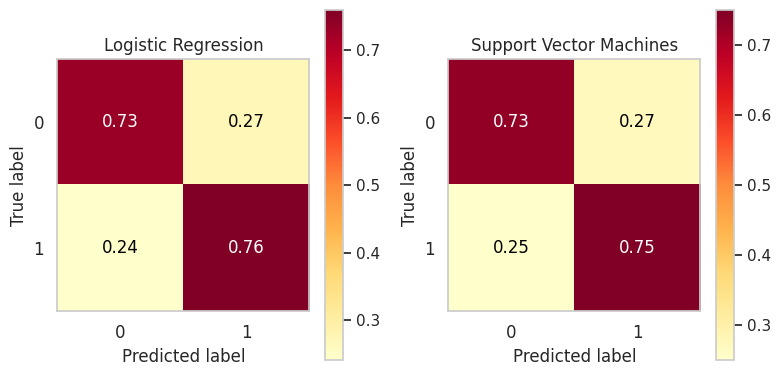

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_logreg, normalize=True, cmap='YlOrRd', ax = ax[0])
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svc, normalize=True, cmap='YlOrRd', ax = ax[1])

ax[0].set_title("Logistic Regression")
ax[1].set_title("Support Vector Machines")

plt.tight_layout();

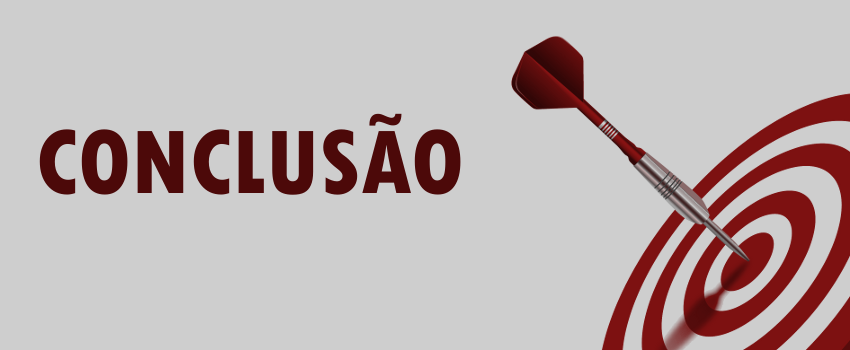

# CONCLUSÃO

Com base nas análises realizadas, podemos concluir que a escolha do modelo de classificação, o pré-processamento dos dados e a técnica de balanceamento de classes são fundamentais para obter um bom desempenho na resolução do problema de Churn.

Observou-se um desempenho consistente tanto no conjunto de testes quanto no conjunto de validação. A técnica de balanceamento de classes por meio de undersampling foi aplicada, removendo apenas dados da classe majoritária. A métrica de recall foi escolhida como prioridade, uma vez que prever o cancelamento de clientes permite à empresa intervir e retê-los. Nesse contexto, prever um cancelamento incorretamente possui menos impacto do que não prever um cancelamento real. Os classificadores de Regressão Logística e SVM se destacaram nesse cenário. Para evitar overfitting, utilizou-se a validação cruzada com a técnica 5x2 CV, recomendada pela literatura.

Entre os algoritmos de machine learning testados, o SVM alcançou a maior métrica de recall, atingindo 0.81 no conjunto de teste balanceado e 0.77 no conjunto de teste desbalanceado. No entanto, o Logistic Regression também apresentou resultados semelhantes e satisfatórios. Além disso, foi possível observar a importância do pré-processamento de dados, incluindo a transformação de variáveis categóricas usando o label encoder e a criação de variáveis dummy. A padronização também se mostrou essencial para se obter um modelo com desempenho eficaz.

Em resumo, a combinação de técnicas de pré-processamento, balanceamento de classes e a escolha adequada de métricas e algoritmos permitiu a construção de modelos de machine learning capazes de prever o cancelamento de clientes com desempenho satisfatório, o que pode ser extremamente valioso para as empresas que desejam reter seus clientes e melhorar sua eficiência operacional.